In [1]:
import pandas as pd
from modules import crfb

In [2]:
# Get the most recent dataset that we have on file
df = crfb.get_data_single()
# Download all the datasets we have, using the column 'Date CRFB Downloaded'
#df = crfb.get_data_all()
#df
df = df.loc[df['Recipient Type'] == 'Health Provider']
df

loading data from date 2021-02-09 : file 20210209_cmt.xlsx...


,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency
1408,Alabama,4.494819e+08,2020-04-10,Health Provider,CARES Act,HHS
1409,Alaska,7.124812e+07,2020-04-10,Health Provider,CARES Act,HHS
1410,Arizona,7.075875e+08,2020-04-10,Health Provider,CARES Act,HHS
1411,Arkansas,3.265360e+08,2020-04-10,Health Provider,CARES Act,HHS
1412,California,2.920961e+09,2020-04-10,Health Provider,CARES Act,HHS
...,...,...,...,...,...,...
7572,Connecticut,4.492982e+06,2020-05-06,Health Provider,CARES Act,HHS
7573,Massachusetts,4.492982e+06,2020-05-06,Health Provider,CARES Act,HHS
7574,Kansas,8.044210e+06,2020-05-06,Health Provider,CARES Act,HHS
7575,Nebraska,8.044210e+06,2020-05-06,Health Provider,CARES Act,HHS


In [3]:
#check if all the column have the same amount of values
states = 'Recipient State'
money = 'Amount Committed/Disbursed'
df.all()


Recipient State                True
Amount Committed/Disbursed    False
Date                           True
Recipient Type                 True
Legislation                    True
Agency                         True
dtype: bool

In [4]:
#checking for null values
df[df[money].isnull() == True]

,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency


In [5]:
#checking for NA values
df[df[money].isna() == True]

,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency


In [6]:
#checking for 0. values
df[df[money] == 0.]

,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency
1461,Micronesia,0.0,2020-04-10,Health Provider,CARES Act,HHS
1463,Palau,0.0,2020-04-10,Health Provider,CARES Act,HHS
7505,US Virgin Islands,0.0,2020-05-08,Health Provider,NaN,CMS


In [7]:
state_group_df = df.groupby('Recipient State')[money].mean().reset_index()
state_group_df



,Recipient State,Amount Committed/Disbursed
0,Alabama,1.792775e+08
1,Alaska,3.916600e+07
2,American Samoa,1.667116e+06
3,Arizona,2.210583e+08
4,Arkansas,1.372664e+08
5,California,1.061148e+09
6,Colorado,1.762672e+08
7,Connecticut,1.739961e+08
8,Delaware,6.059996e+07
9,District of Columbia,5.821703e+07


In [8]:
territory_list = ['American Samoa','Guam','Micronesia','Northern Mariana Islands','Palau','Puerto Rico', 'US Virgin Islands']
territory_grouped_df = state_group_df[state_group_df[states].isin(territory_list) == True]
territory_grouped_df

,Recipient State,Amount Committed/Disbursed
2,American Samoa,1.667116e+06
12,Guam,3.450248e+06
25,Micronesia,8.913162e+05
38,Northern Mariana Islands,1.135640e+06
42,Palau,5.162660e+05
44,Puerto Rico,2.048777e+07
50,US Virgin Islands,2.643332e+06


In [9]:
idx_list = territory_grouped_df.index
print(idx_list)
state_group_df = state_group_df.drop(axis = 0, index = idx_list).reset_index(drop=True)
state_group_df

Int64Index([2, 12, 25, 38, 42, 44, 50], dtype='int64')


,Recipient State,Amount Committed/Disbursed
0,Alabama,1.792775e+08
1,Alaska,3.916600e+07
2,Arizona,2.210583e+08
3,Arkansas,1.372664e+08
4,California,1.061148e+09
5,Colorado,1.762672e+08
6,Connecticut,1.739961e+08
7,Delaware,6.059996e+07
8,District of Columbia,5.821703e+07
9,Florida,7.226082e+08


In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def bar_plot(labels, bars, title):
    fig, ax = plt.subplots(figsize=(15,8))

    labels = labels.to_list()
    width = 0.8  # the width of the bars
    x = np.arange(len(labels))
    ax.bar(x,bars, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average '+money+' ($)', fontsize = (18))
    ax.set_title(title, fontsize = (25))
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize = (17), rotation = 'vertical')
    plt.yticks(fontsize=18)

    return(plt.show())

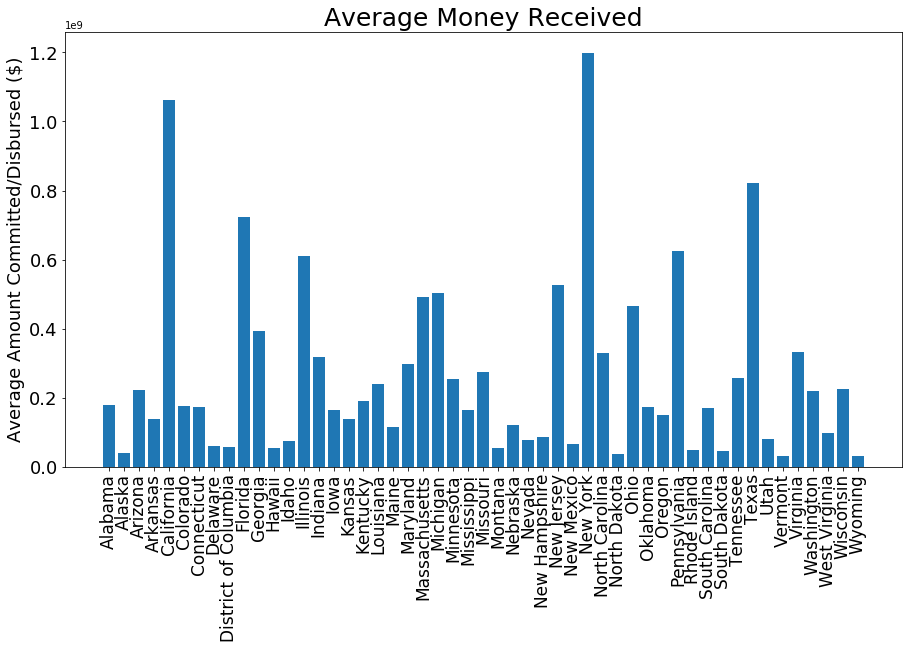

In [11]:
#plotting the data for all the states
bar_plot(state_group_df[states],  state_group_df[money], 'Average Money Received')

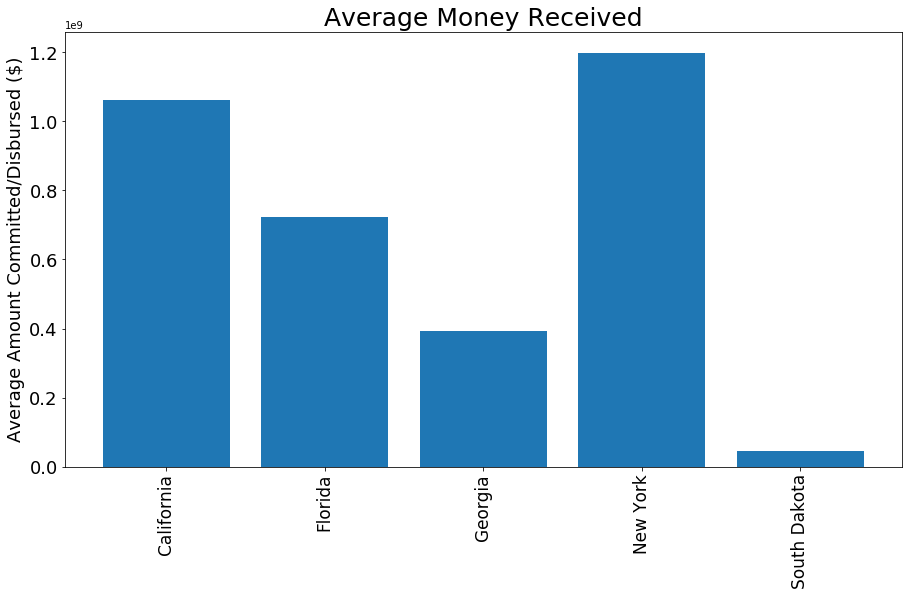

In [12]:
#plotting the data only for the states of interest
state_OI = ['New York', 'South Dakota','Florida', 'California','Georgia']
state_groupOI_df = state_group_df.loc[state_group_df[states].isin(state_OI)]
bar_plot(state_groupOI_df[states],  state_groupOI_df[money], 'Average Money Received')

In [13]:
# starting to build the plot for showing the trend over the time per each state of interest

states_df = df.loc[df[states].isin(territory_list) == False]
states_df

,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency
1408,Alabama,4.494819e+08,2020-04-10,Health Provider,CARES Act,HHS
1409,Alaska,7.124812e+07,2020-04-10,Health Provider,CARES Act,HHS
1410,Arizona,7.075875e+08,2020-04-10,Health Provider,CARES Act,HHS
1411,Arkansas,3.265360e+08,2020-04-10,Health Provider,CARES Act,HHS
1412,California,2.920961e+09,2020-04-10,Health Provider,CARES Act,HHS
...,...,...,...,...,...,...
7572,Connecticut,4.492982e+06,2020-05-06,Health Provider,CARES Act,HHS
7573,Massachusetts,4.492982e+06,2020-05-06,Health Provider,CARES Act,HHS
7574,Kansas,8.044210e+06,2020-05-06,Health Provider,CARES Act,HHS
7575,Nebraska,8.044210e+06,2020-05-06,Health Provider,CARES Act,HHS


In [14]:
import datetime
#converting the dates in timestamp - it will serve the purpose later on probably
dates = states_df['Date'].to_list()
timestamp = [datetime.datetime.timestamp(dates[x]) for x, date in enumerate(dates) ]
states_df['Timestamp'] = timestamp
states_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency,Timestamp
1408,Alabama,4.494819e+08,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1409,Alaska,7.124812e+07,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1410,Arizona,7.075875e+08,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1411,Arkansas,3.265360e+08,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1412,California,2.920961e+09,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
...,...,...,...,...,...,...,...
7572,Connecticut,4.492982e+06,2020-05-06,Health Provider,CARES Act,HHS,1.588738e+09
7573,Massachusetts,4.492982e+06,2020-05-06,Health Provider,CARES Act,HHS,1.588738e+09
7574,Kansas,8.044210e+06,2020-05-06,Health Provider,CARES Act,HHS,1.588738e+09
7575,Nebraska,8.044210e+06,2020-05-06,Health Provider,CARES Act,HHS,1.588738e+09


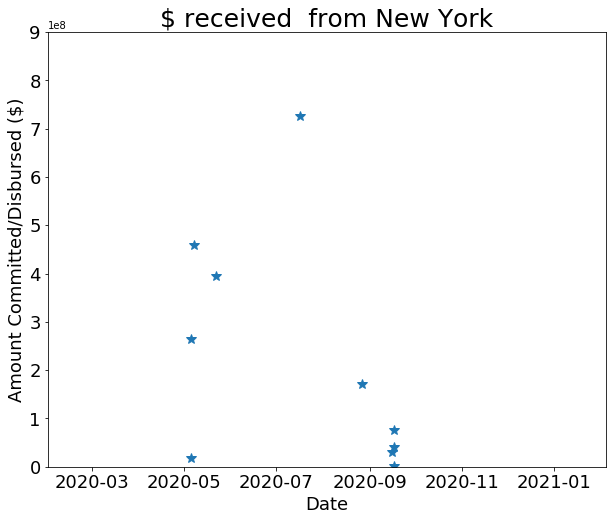

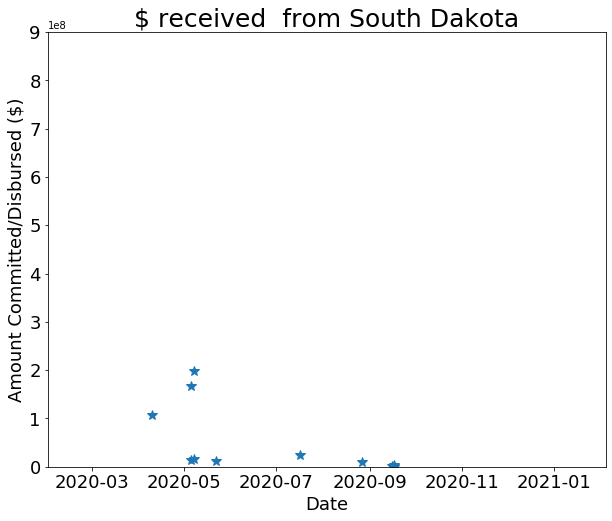

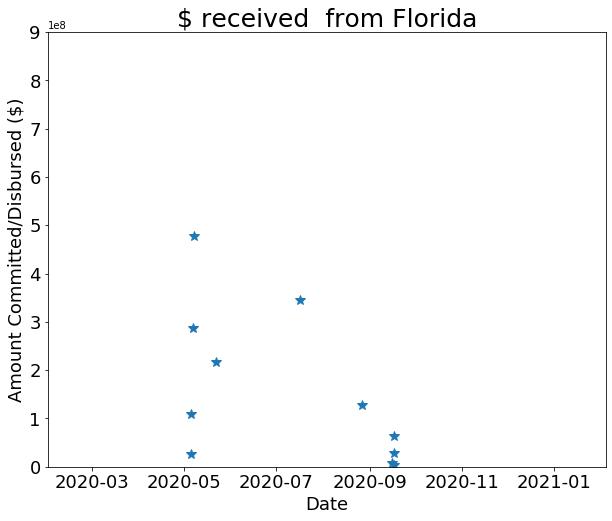

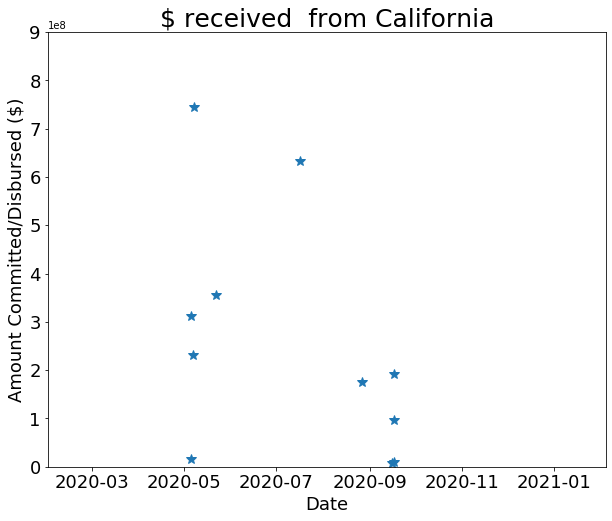

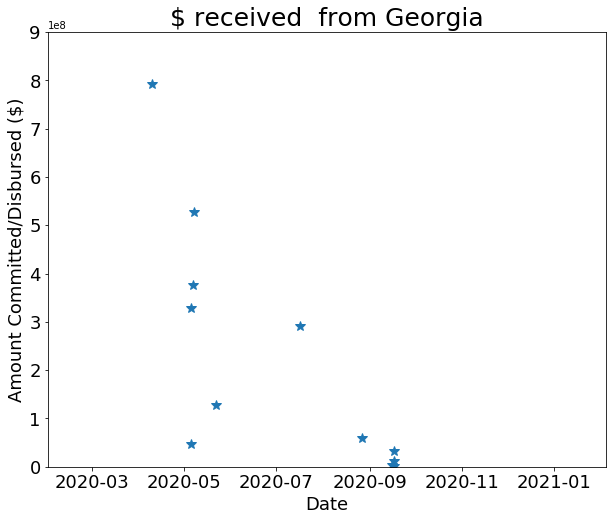

In [18]:
# different amounts in the same date uhmm
start_date = datetime.date(2020, 2, 1)
end_date = datetime.date(2021, 2, 4)
for state in state_OI:
    State = states_df.loc[states_df[states]== state]
    plt.subplots(figsize=(10,8))
    plt.plot(State['Date'],State[money], ls = 'none', marker = '*', markersize = 10)
    plt.ylabel(money+' ($)', fontsize = (18))
    plt.xlabel('Date', fontsize = (18))
    plt.title('$ received  from '+state, fontsize = (25))
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.ylim(0,900000000)
    plt.xlim(start_date,end_date)
    plt.show()
   